## Bernstein Vazirani in Qiskit
Group C

Fredrik Etsare, fret6070
Lars Herbold, lahe8507 

### 2 Implementing inner Products as a Black Box

Task 1 (Implementing the Inner Product Function). Implement a function inner_product(circuit,a)
that takes as input a quantum circuit circuit and a binary string a, and adds to circuit the
CNOT gates corresponding to a. You can assume that the circuit has n + 1 qubits, numbered
from 0, 1, ..., n, where n = len(a).

      ░                 ░ 
q_0: ─░───■─────────────░─
      ░   │             ░ 
q_1: ─░───┼─────────────░─
      ░   │             ░ 
q_2: ─░───┼────■────────░─
      ░   │    │        ░ 
q_3: ─░───┼────┼────■───░─
      ░   │    │    │   ░ 
q_4: ─░───┼────┼────┼───░─
      ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_5: ─░─┤ X ├┤ X ├┤ X ├─░─
      ░ └───┘└───┘└───┘ ░ 
c: 6/═════════════════════
                          


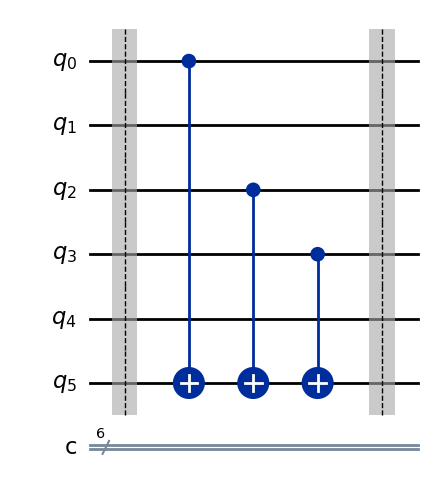

In [13]:
c = QuantumCircuit(6, 6)
def inner_product(circuit, a):
    circuit.barrier()
    
    output_qubit_index = len(a)
    reversed_a = a[::-1]
    
    for i, bit in enumerate(reversed_a):
        if bit == "1":
            control_qubit_index = i
            circuit.cx(control_qubit_index, output_qubit_index)
    circuit.barrier()
        
inner_product(c, "01101")
c.draw("mpl")

### 3 Adding a layer of Hadamard Gates
Implement a function Hadamards(circuit) that takes as input a quantum circuit
circuit and adds one Hadamard gate to each qubit of the circuit. To get the number of
qubits, use the attribute circuit.num_qubits.

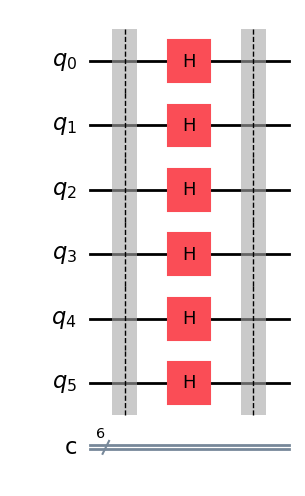

In [37]:
c = QuantumCircuit(6, 6)

def Hadamards(circuit):
    circuit.barrier()
    for q in range(circuit.num_qubits):
        circuit.h(q)
    circuit.barrier()

Hadamards(c)
c.draw("mpl")

### 4 Constucting the Bernstein-Vazirani Circuit
Task 3. Implement a function bernstein_vazirani(a) that takes as input a binary string
a and returns a quantum circuit implementing the Bernstein-Vazirani protocol with respect
to the secret bit string a. Your function preforms the following steps:
1. Let n=len(a)
2. Create a quantum circuit circuit with n + 1 qubits and n bits.
3. Apply the X gate to flip the output qubit from |0⟩ to |1⟩.
4. Apply a layer of Hadamard Gates.
5. Apply the inner product circuit with respect to a.
6. Apply another layer of Hadamard Gates.
7. Measure the n input qubits 0, 1, ..., n − 1 and store the result into the classical qubits
0, 1, ..., n − 1.
8. return the circuit.

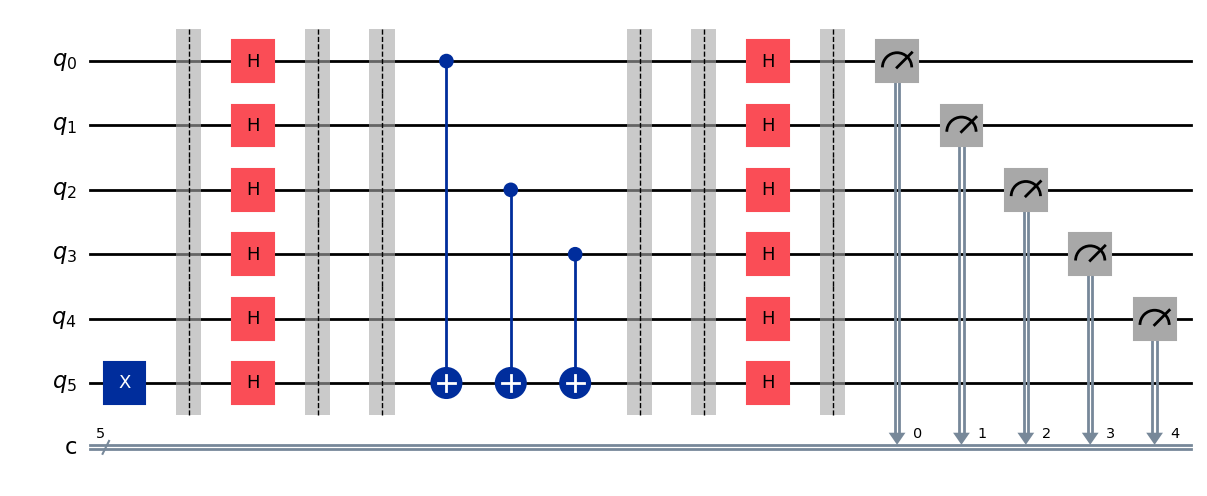

In [38]:
def measure(circuit, n):
    for q in range(n):
        circuit.measure(q, q)

def bernstein_vazirani(a):
    n = len(a)
    circuit = QuantumCircuit(n + 1, n)
    circuit.x(n)
    Hadamards(circuit)
    inner_product(circuit, a)
    Hadamards(circuit)
    measure(circuit, n)
    return circuit

bernstein_vazirani("01101").draw("mpl")


### 5 Simulating the circuit
Simulate your circuit using a method of your choice. But for the submission, please
use either BasicSimulator() or AerSimulator(), since I need to execute your code locally.

In [39]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit_aer import AerSimulator

def get_probabilities(counts, shots):
    return {key : value / shots for key , value in counts.items()}

def decimalize_keys(dictionary):
    return {int(k, 2): v for k, v in dictionary.items()}

def simulate(a, n_shots):
    circuit = bernstein_vazirani(a)
    #backend = BasicSimulator()
    backend = AerSimulator()
    result = backend.run(circuit, shots=n_shots).result()
    counts = result.get_counts()
    probs = get_probabilities(counts, shots=n_shots)
    print ("Counts:" , decimalize_keys(counts))
    print ("Probabilities:" , decimalize_keys(probs))

simulate("01101", 2048)

Counts: {13: 2048}
Probabilities: {13: 1.0}
